In [234]:
import  re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [235]:
file_path = 'smartwatches.csv'
df = pd.read_csv(file_path,index_col='Unnamed: 0')
df.drop_duplicates(inplace=True)
train_df = df.sample(frac=0.8,random_state=42)
test_df = df.drop(train_df.index)
train_df = train_df.reset_index()
test_df = test_df.reset_index()

In [236]:
df.shape,train_df.shape,test_df.shape

((440, 15), (352, 16), (88, 16))

In [237]:
train_df.head()

,index,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,275,garmin,64990.0,82990.0,21.689360,4.7,NaN,"Fenix 6S Sapphire, Premium GPS Watch, Music, P...",Circle,Black,Silicon,Yes,22.0,Yes,1.2 inches,75g +
1,84,ambrane,2368.0,4499.0,47.366081,3.5,301.0,FitShot Curl,NaN,NaN,NaN,NaN,12.5,Yes,NaN,35 - 50 g
2,357,ambrane,1799.0,3799.0,52.645433,4.2,8003.0,Flex 1.69inch Lucid display and SPO2,Square,Pink,Silicon,Yes,22.0,Yes,1.7 inches,NaN
3,265,garmin,33490.0,36990.0,9.462017,4.6,5.0,"Instinct 2, Battery Upto 28 days, Tracback Rou...",Circle,Black,Silicon,No,17.5,Yes,0.9 inches,NaN
4,337,gizmore,1199.0,4499.0,73.349633,4.7,NaN,GizFit CLOUD 1.85 IPS Large Display | AI Voice...,Square,Blue,Silicon,Yes,22.0,Yes,1.8 inches,20 - 35 g


In [238]:
train_df.drop('index',axis=1,inplace=True)

In [239]:
train_df['Display Size'].isna().sum()

np.int64(26)

In [240]:
train_df['Display Size'].value_counts()

Display Size
1.7 inches     57
1.3 inches     47
1.8 inches     44
1.4 inches     35
0.1 inches     26
1.6 inches     25
1.9 inches     20
1.2 inches     17
4.4 inches      5
4.3 inches      5
0.9 inches      4
1.0 inches      4
1.5 inches      4
1.1 inches      4
0.2 inches      4
2.7 inches      2
20.0 inches     2
3.3 inches      2
3.5 inches      2
0.0 inches      1
0.8 inches      1
2.0 inches      1
2.3 inches      1
0.5 inches      1
45.0 inches     1
0.6 inches      1
6.9 inches      1
33.0 inches     1
18.5 inches     1
2.4 inches      1
4.6 inches      1
4.2 inches      1
3.0 inches      1
27.9 inches     1
15.9 inches     1
4.5 inches      1
Name: count, dtype: int64

In [241]:
train_df['Display Size'].fillna('0.0 inches', inplace = True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11552\1975416813.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Display Size'].fillna('0.0 inches', inplace = True)


In [242]:
train_df['Display Size'].isna().sum()

np.int64(0)

In [243]:
train_df['Display Size'] = train_df['Display Size'].apply(lambda x: float(x.split()[0]))

In [244]:
train_df['Display Size'].head()

0    1.2
1    0.0
2    1.7
3    0.9
4    1.8
Name: Display Size, dtype: float64

In [245]:
train_df['Display Size'].replace(0.0,np.nan,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11552\759104598.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Display Size'].replace(0.0,np.nan,inplace=True)


In [246]:
train_df['Display Size'].isna().sum()

np.int64(27)

In [247]:
train_df['Weight'].value_counts()

Weight
20 - 35 g    62
75g +        54
35 - 50 g    42
<= 20 g      37
50 - 75 g    10
Name: count, dtype: int64

In [248]:
re.findall('\d+','20 - 35 g')

['20', '35']

In [249]:
cal = sum([int(x) for x  in re.findall('\d+','20 - 35 g')]) /2
cal

27.5

In [250]:
train_df['Weight'].replace('20 - 35 g',cal,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11552\2795161256.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Weight'].replace('20 - 35 g',cal,inplace=True)


In [251]:
train_df['Weight'].value_counts()

Weight
27.5         62
75g +        54
35 - 50 g    42
<= 20 g      37
50 - 75 g    10
Name: count, dtype: int64

In [252]:
cal = sum([int(x) for x  in re.findall('\d+','35 - 50 g')]) /2
train_df['Weight'].replace('35 - 50 g',cal,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11552\1786500352.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Weight'].replace('35 - 50 g',cal,inplace=True)


In [253]:
train_df['Weight'].value_counts()

Weight
27.5         62
75g +        54
42.5         42
<= 20 g      37
50 - 75 g    10
Name: count, dtype: int64

In [254]:
cal = sum([int(x) for x  in re.findall('\d+','50 - 75 g')]) /2
train_df['Weight'].replace('50 - 75 g',cal,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11552\1935911562.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Weight'].replace('50 - 75 g',cal,inplace=True)


In [255]:
train_df['Weight'].value_counts()

Weight
27.5       62
75g +      54
42.5       42
<= 20 g    37
62.5       10
Name: count, dtype: int64

In [256]:
train_df['Weight'].replace('75g +',float(re.findall('\d+','75g +')[0]),inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11552\3003243348.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Weight'].replace('75g +',float(re.findall('\d+','75g +')[0]),inplace=True)


In [257]:
train_df['Weight'].value_counts()

Weight
27.5       62
75.0       54
42.5       42
<= 20 g    37
62.5       10
Name: count, dtype: int64

In [258]:
train_df['Weight'].replace('<= 20 g',float(re.findall('\d+','<= 20 g')[0]),inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11552\3242668750.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Weight'].replace('<= 20 g',float(re.findall('\d+','<= 20 g')[0]),inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11552\3242668750.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcast

In [259]:
train_df['Weight'].value_counts()

Weight
27.5    62
75.0    54
42.5    42
20.0    37
62.5    10
Name: count, dtype: int64

In [260]:
train_df.head()

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,garmin,64990.0,82990.0,21.689360,4.7,NaN,"Fenix 6S Sapphire, Premium GPS Watch, Music, P...",Circle,Black,Silicon,Yes,22.0,Yes,1.2,75.0
1,ambrane,2368.0,4499.0,47.366081,3.5,301.0,FitShot Curl,NaN,NaN,NaN,NaN,12.5,Yes,NaN,42.5
2,ambrane,1799.0,3799.0,52.645433,4.2,8003.0,Flex 1.69inch Lucid display and SPO2,Square,Pink,Silicon,Yes,22.0,Yes,1.7,NaN
3,garmin,33490.0,36990.0,9.462017,4.6,5.0,"Instinct 2, Battery Upto 28 days, Tracback Rou...",Circle,Black,Silicon,No,17.5,Yes,0.9,NaN
4,gizmore,1199.0,4499.0,73.349633,4.7,NaN,GizFit CLOUD 1.85 IPS Large Display | AI Voice...,Square,Blue,Silicon,Yes,22.0,Yes,1.8,27.5


In [261]:
train_df['Discount Price'] = (train_df['Original Price']*(-train_df['Discount Percentage']))/100

In [262]:
train_df.head()

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight,Discount Price
0,garmin,64990.0,82990.0,21.689360,4.7,NaN,"Fenix 6S Sapphire, Premium GPS Watch, Music, P...",Circle,Black,Silicon,Yes,22.0,Yes,1.2,75.0,-17999.999997
1,ambrane,2368.0,4499.0,47.366081,3.5,301.0,FitShot Curl,NaN,NaN,NaN,NaN,12.5,Yes,NaN,42.5,-2131.000000
2,ambrane,1799.0,3799.0,52.645433,4.2,8003.0,Flex 1.69inch Lucid display and SPO2,Square,Pink,Silicon,Yes,22.0,Yes,1.7,NaN,-2000.000000
3,garmin,33490.0,36990.0,9.462017,4.6,5.0,"Instinct 2, Battery Upto 28 days, Tracback Rou...",Circle,Black,Silicon,No,17.5,Yes,0.9,NaN,-3500.000000
4,gizmore,1199.0,4499.0,73.349633,4.7,NaN,GizFit CLOUD 1.85 IPS Large Display | AI Voice...,Square,Blue,Silicon,Yes,22.0,Yes,1.8,27.5,-3300.000000


In [263]:
train_df.drop('Discount Percentage',axis=1,inplace=True)

In [264]:
train_df.shape

(352, 15)

## Numerical data

In [265]:
numerical_data = [feature for feature in train_df.columns if train_df[feature].dtype != object]

In [266]:
numerical_data

['Current Price',
 'Original Price',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)',
 'Display Size',
 'Weight',
 'Discount Price']

In [267]:
train_df[numerical_data].head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price
0,64990.0,82990.0,4.7,NaN,22.0,1.2,75.0,-17999.999997
1,2368.0,4499.0,3.5,301.0,12.5,NaN,42.5,-2131.000000
2,1799.0,3799.0,4.2,8003.0,22.0,1.7,NaN,-2000.000000
3,33490.0,36990.0,4.6,5.0,17.5,0.9,NaN,-3500.000000
4,1199.0,4499.0,4.7,NaN,22.0,1.8,27.5,-3300.000000


## Categorical Data

In [268]:
categorical_data =[feature for feature in train_df.columns if train_df[feature].dtype == object]

In [269]:
categorical_data

['Brand',
 'Model Name',
 'Dial Shape',
 'Strap Color',
 'Strap Material',
 'Touchscreen',
 'Bluetooth']

# Numerical Data

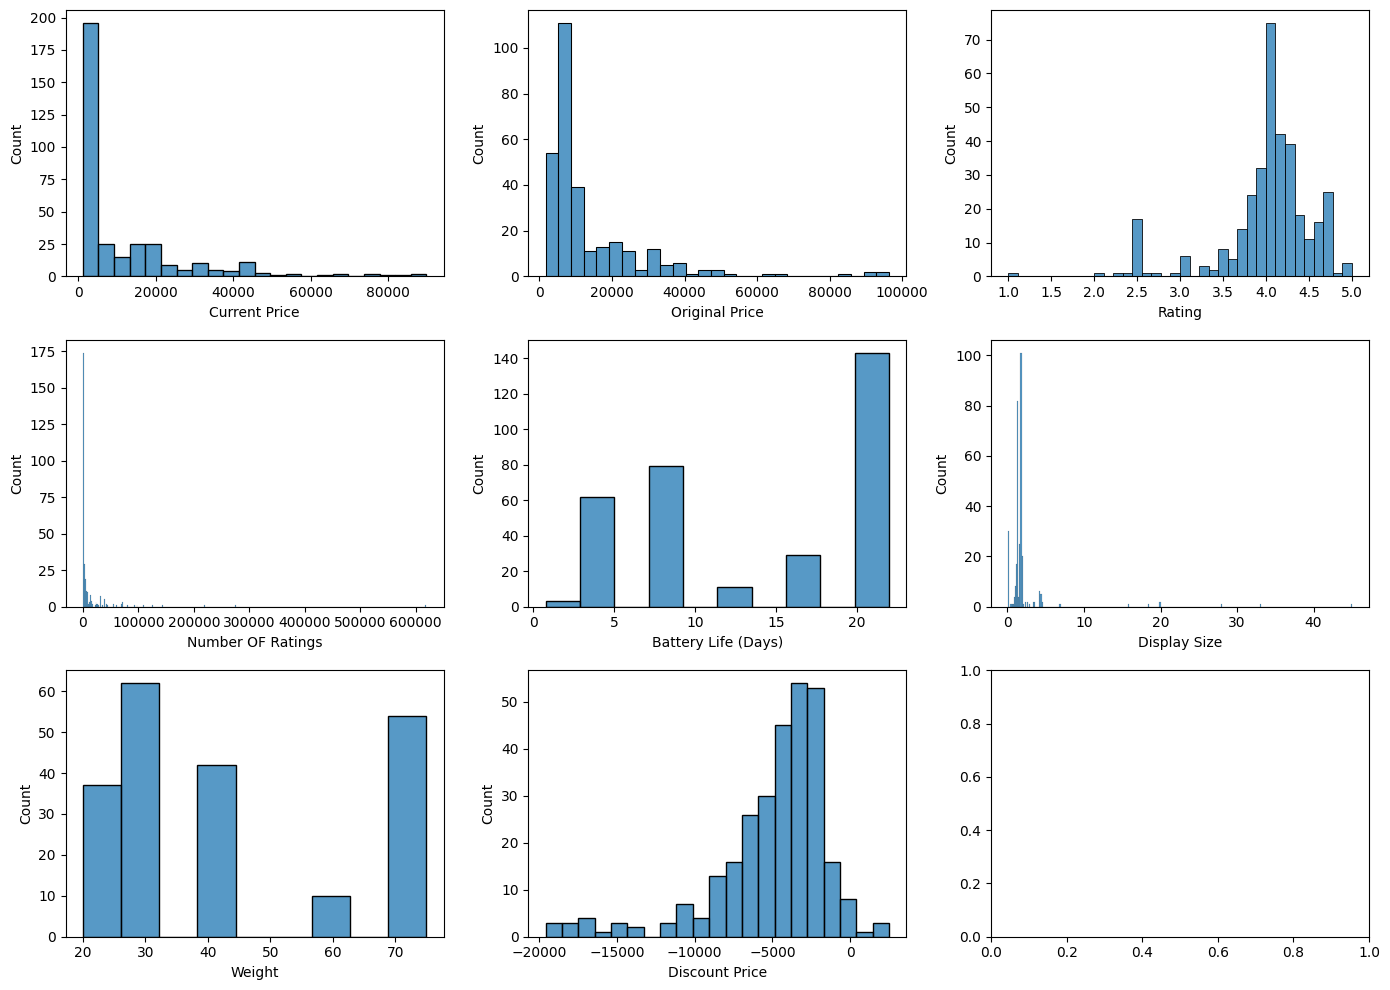

In [270]:
# Histogram
fig, axes = plt.subplots(nrows=3,ncols=3,figsize=(14,10))
for i,colum in enumerate(numerical_data):
    row = i//3
    col= i % 3
    ax = axes[row,col]
    sns.histplot(data = train_df[colum],ax= ax)
plt.tight_layout()
plt.show()

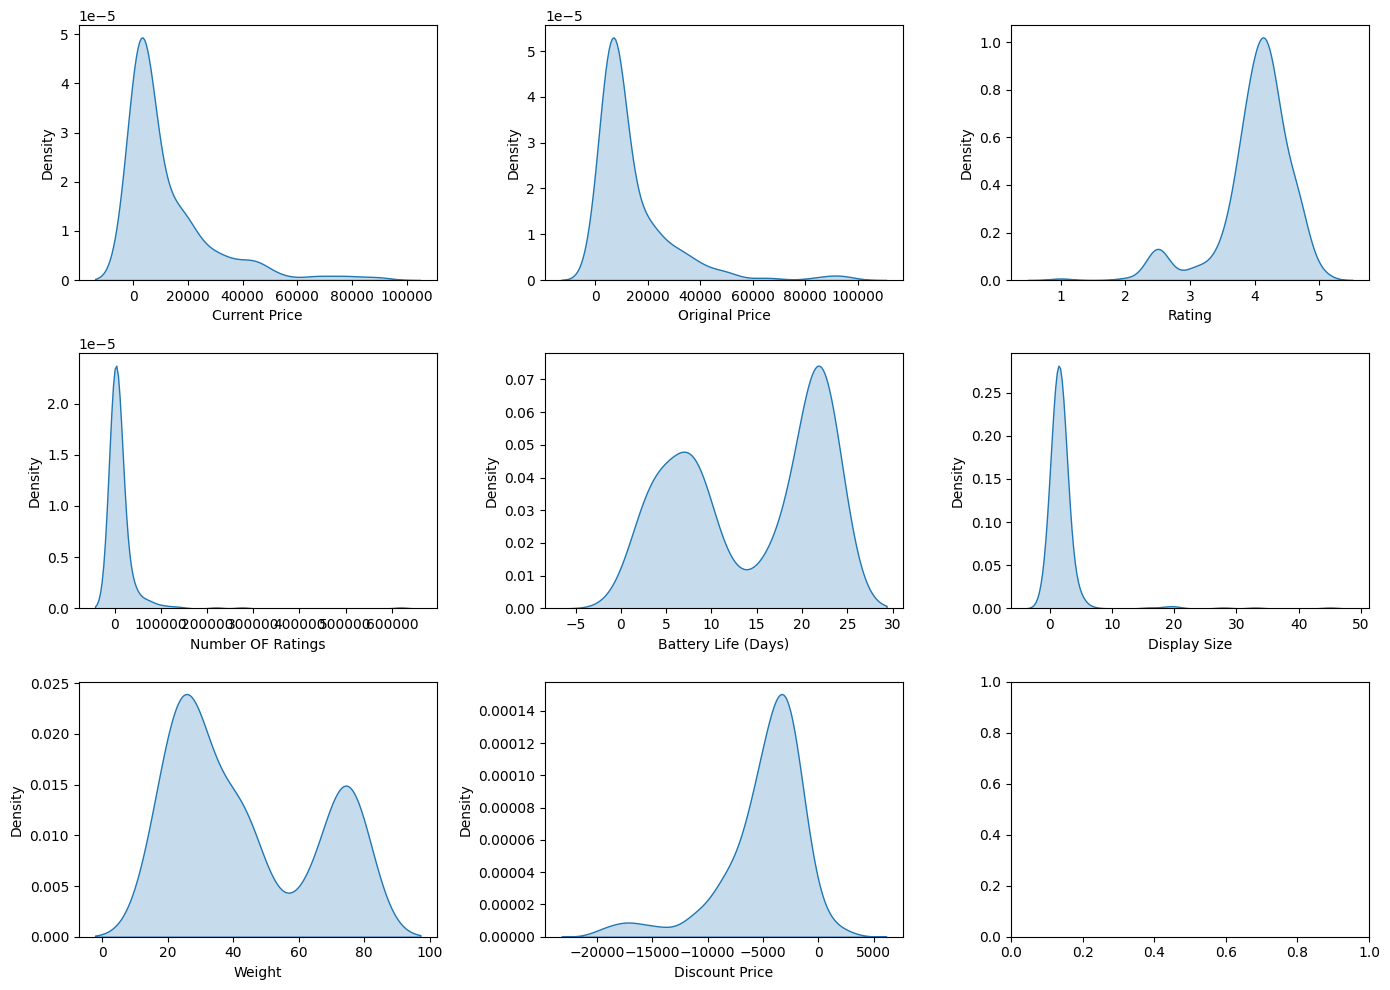

In [271]:
# Density Plots
fig, axes = plt.subplots(nrows=3,ncols=3,figsize=(14,10))
for i,colum in enumerate(numerical_data):
    row = i//3
    col= i % 3
    ax = axes[row,col]
    sns.kdeplot(data = train_df[colum],ax= ax,fill=True)
plt.tight_layout()
plt.show()

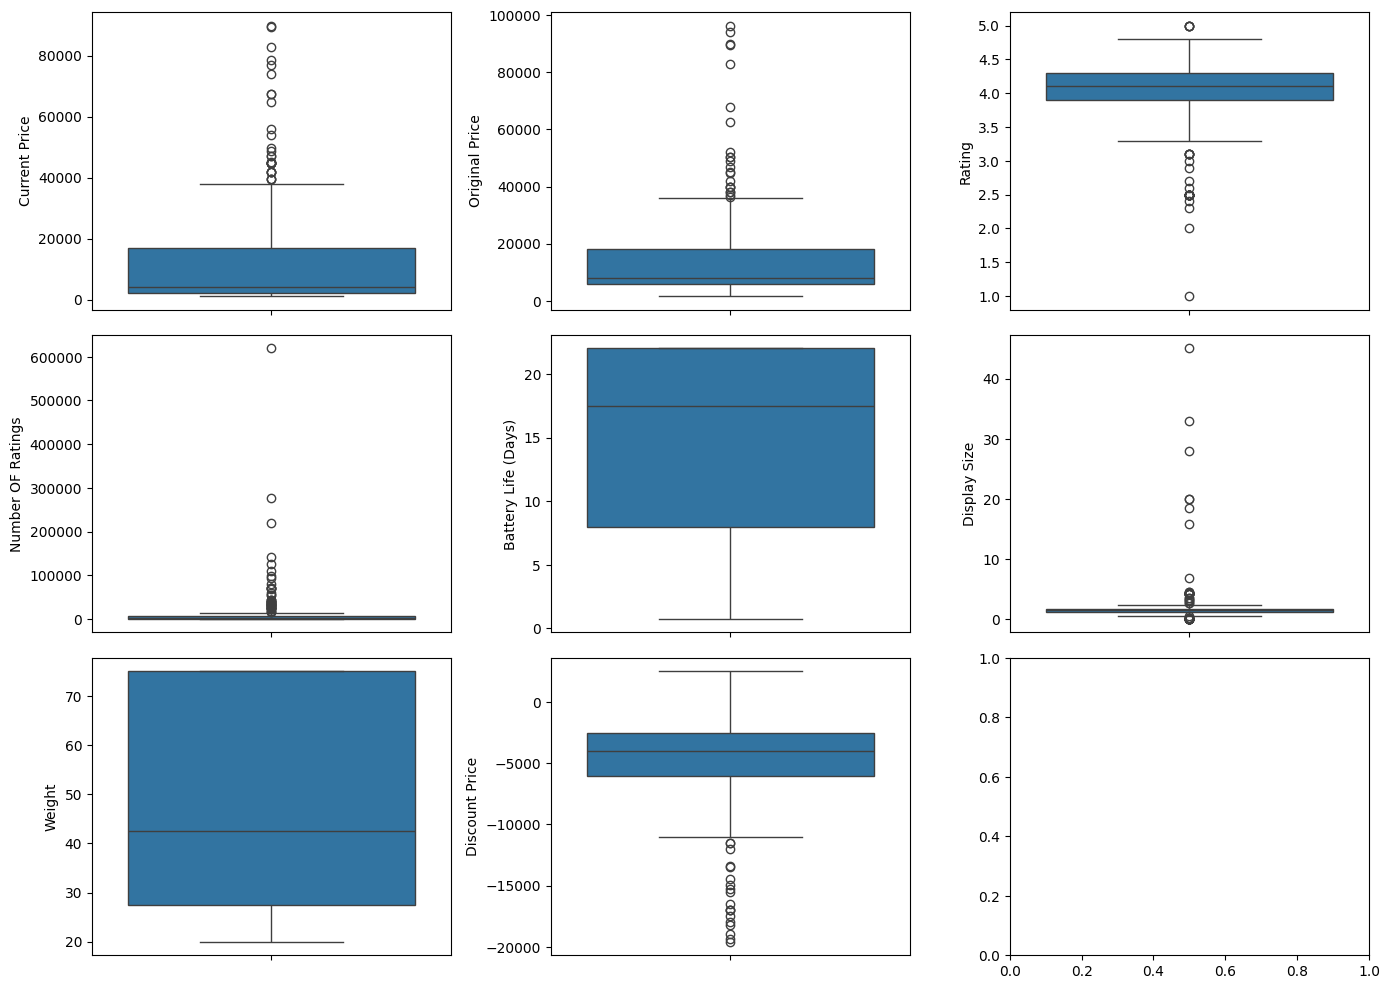

In [272]:
# Box Plot
fig, axes = plt.subplots(nrows=3,ncols=3,figsize=(14,10))
for i,colum in enumerate(numerical_data):
    row = i//3
    col= i % 3
    ax = axes[row,col]
    sns.boxplot(data = train_df[colum],ax= ax)
plt.tight_layout()
plt.show()

# 📊 Box Plot Summary

## ✅ Key Parts of a Box Plot

| Part                     | What It Means                                      |
|--------------------------|----------------------------------------------------|
| **Box (Q1 to Q3)**       | The middle 50% of the data                         |
| **Line in the Box**      | The median (middle value of the data)              |
| **Whiskers**             | Extend to the minimum and maximum non-outlier values |
| **Dots/Stars**           | Represent outliers (very high or low values)       |

---

## 🧠 Definitions

- **Q1 (25th percentile):** 25% of values are below this  
- **Q3 (75th percentile):** 75% of values are below this  
- **IQR (Interquartile Range):** `Q3 - Q1` → range of the middle 50%  
- **Outliers:**  
  Values that fall:
  - Below `Q1 - 1.5 × IQR`, or  
  - Above `Q3 + 1.5 × IQR`

---

📌 Use box plots to quickly understand **data spread**, **central tendency**, and **outliers**!


In [273]:
train_df.shape

(352, 15)

In [274]:
def remove_outliers_IQR(data,col):
    """removes the outliers"""
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1- 1.5 *IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[col]>lower_bound)&(data[col]<upper_bound)]

In [275]:
train_df.columns

Index(['Brand', 'Current Price', 'Original Price', 'Rating',
       'Number OF Ratings', 'Model Name', 'Dial Shape', 'Strap Color',
       'Strap Material', 'Touchscreen', 'Battery Life (Days)', 'Bluetooth',
       'Display Size', 'Weight', 'Discount Price'],
      dtype='object')

In [276]:
import_col = ['Current Price', 'Original Price', 'Rating','Number OF Ratings','Display Size','Discount Price']
for col in import_col:
    train_df = remove_outliers_IQR(train_df,col)

In [277]:
for col in numerical_data:
    print(col)
    train_df[col] = train_df[col].fillna(train_df[col].median())

Current Price
Original Price
Rating
Number OF Ratings
Battery Life (Days)
Display Size
Weight
Discount Price


In [278]:
train_df.isna().sum()

Brand                   0
Current Price           0
Original Price          0
Rating                  0
Number OF Ratings       0
Model Name              6
Dial Shape             36
Strap Color            36
Strap Material         18
Touchscreen             4
Battery Life (Days)     0
Bluetooth               0
Display Size            0
Weight                  0
Discount Price          0
dtype: int64

In [279]:
train_df.shape

(124, 15)

In [280]:
train_df[numerical_data]

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price
2,1799.0,3799.0,4.2,8003.0,22.0,1.7,42.5,-2000.000000
5,13195.0,21995.0,3.9,510.0,22.0,1.6,42.5,-8800.000001
10,3999.0,5999.0,4.2,3130.0,22.0,1.8,75.0,-2000.000000
15,3299.0,5999.0,4.0,102.0,12.5,1.3,75.0,-2700.000000
19,1499.0,3999.0,4.0,6638.0,22.0,1.3,42.5,-2500.000000
...,...,...,...,...,...,...,...,...
342,1799.0,3999.0,4.2,5970.0,22.0,1.7,42.5,-2200.000000
343,8999.0,14999.0,4.4,7792.0,17.5,1.4,42.5,-5999.999999
347,10990.0,20990.0,4.5,203.0,8.0,1.8,75.0,-10000.000000
349,1999.0,5999.0,3.5,30.0,3.5,1.6,20.0,-4000.000000


In [281]:
 from sklearn.preprocessing import MinMaxScaler

In [282]:
scaler = MinMaxScaler()

In [283]:
data = scaler.fit_transform(train_df[numerical_data[:-1]])

In [284]:
data = pd.DataFrame(data,columns=numerical_data[:-1])

In [285]:
data.head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight
0,0.025761,0.072534,0.750000,0.276596,1.000000,0.538462,0.409091
1,0.515049,0.756029,0.500000,0.017529,1.000000,0.461538,0.409091
2,0.120218,0.155172,0.750000,0.108115,1.000000,0.615385,1.000000
3,0.090164,0.155172,0.583333,0.003423,0.552941,0.230769,1.000000
4,0.012881,0.080047,0.583333,0.229402,1.000000,0.230769,0.409091


In [286]:
data.shape,train_df.shape

((124, 7), (124, 15))

In [287]:
train_df.drop(numerical_data[:-1],axis=1,inplace=True)

In [288]:
train_df.head()

,Brand,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Bluetooth,Discount Price
2,ambrane,Flex 1.69inch Lucid display and SPO2,Square,Pink,Silicon,Yes,Yes,-2000.000000
5,fossil,4th Gen Venture HR,Circle,Gold,Stainless Steel,Yes,Yes,-8800.000001
10,amazfit,Pop 2 with Ultra-large 1.78 inch HD AMOLED Dis...,Square,Pink,Silicon,Yes,Yes,-2000.000000
15,gizmore,910,NaN,NaN,Plastic,Yes,Yes,-2700.000000
19,noise,"Core 2 1.28"" Display , Noisefit sync app, 100+...",Circle,Black,Silicon,Yes,Yes,-2500.000000


In [289]:
train_df = pd.concat([train_df.reset_index(),data],axis=1)

In [290]:
train_df.isna().sum()

index                   0
Brand                   0
Model Name              6
Dial Shape             36
Strap Color            36
Strap Material         18
Touchscreen             4
Bluetooth               0
Discount Price          0
Current Price           0
Original Price          0
Rating                  0
Number OF Ratings       0
Battery Life (Days)     0
Display Size            0
Weight                  0
dtype: int64

In [291]:
train_df.head()

,index,Brand,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Bluetooth,Discount Price,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight
0,2,ambrane,Flex 1.69inch Lucid display and SPO2,Square,Pink,Silicon,Yes,Yes,-2000.000000,0.025761,0.072534,0.750000,0.276596,1.000000,0.538462,0.409091
1,5,fossil,4th Gen Venture HR,Circle,Gold,Stainless Steel,Yes,Yes,-8800.000001,0.515049,0.756029,0.500000,0.017529,1.000000,0.461538,0.409091
2,10,amazfit,Pop 2 with Ultra-large 1.78 inch HD AMOLED Dis...,Square,Pink,Silicon,Yes,Yes,-2000.000000,0.120218,0.155172,0.750000,0.108115,1.000000,0.615385,1.000000
3,15,gizmore,910,NaN,NaN,Plastic,Yes,Yes,-2700.000000,0.090164,0.155172,0.583333,0.003423,0.552941,0.230769,1.000000
4,19,noise,"Core 2 1.28"" Display , Noisefit sync app, 100+...",Circle,Black,Silicon,Yes,Yes,-2500.000000,0.012881,0.080047,0.583333,0.229402,1.000000,0.230769,0.409091


# Categorical Data

In [292]:
train_df[categorical_data].head()

,Brand,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Bluetooth
0,ambrane,Flex 1.69inch Lucid display and SPO2,Square,Pink,Silicon,Yes,Yes
1,fossil,4th Gen Venture HR,Circle,Gold,Stainless Steel,Yes,Yes
2,amazfit,Pop 2 with Ultra-large 1.78 inch HD AMOLED Dis...,Square,Pink,Silicon,Yes,Yes
3,gizmore,910,NaN,NaN,Plastic,Yes,Yes
4,noise,"Core 2 1.28"" Display , Noisefit sync app, 100+...",Circle,Black,Silicon,Yes,Yes


In [293]:
categorical_data.remove('Bluetooth')

In [294]:
from scipy.stats import f_oneway

In [295]:
for col in categorical_data:
    CategoryGroupLists = train_df.groupby(col)['Discount Price'].apply(list)
    AnovaResults = f_oneway(*CategoryGroupLists)
    print(col,' : ','P-Value for anova is : ',AnovaResults[1])

Brand  :  P-Value for anova is :  8.48904502053651e-07
Model Name  :  P-Value for anova is :  0.4257504061029152
Dial Shape  :  P-Value for anova is :  0.0006572733631442465
Strap Color  :  P-Value for anova is :  0.9153961679829369
Strap Material  :  P-Value for anova is :  0.2446993142325369
Touchscreen  :  P-Value for anova is :  0.7617551266931157


In [296]:
imp_col = ['Brand','Model Name','Dial Shape','Strap Material']

In [297]:
train_df[imp_col].head()

,Brand,Model Name,Dial Shape,Strap Material
0,ambrane,Flex 1.69inch Lucid display and SPO2,Square,Silicon
1,fossil,4th Gen Venture HR,Circle,Stainless Steel
2,amazfit,Pop 2 with Ultra-large 1.78 inch HD AMOLED Dis...,Square,Silicon
3,gizmore,910,NaN,Plastic
4,noise,"Core 2 1.28"" Display , Noisefit sync app, 100+...",Circle,Silicon


In [298]:
for col in imp_col:
    train_df[col] = train_df[col].fillna('other')

In [299]:
train_df[imp_col].isna().sum()

Brand             0
Model Name        0
Dial Shape        0
Strap Material    0
dtype: int64

In [300]:
brand = pd.get_dummies(train_df['Brand'])

In [301]:
model_name = pd.get_dummies(train_df['Model Name']).drop(['other'],axis=1)
dial_shape = pd.get_dummies(train_df['Dial Shape']).drop(['other'],axis=1)
strap_material = pd.get_dummies(train_df['Strap Material']).drop(['other'],axis=1)

In [302]:
imp_df = pd.concat([brand,model_name,dial_shape,strap_material],axis=1)

In [303]:
imp_df.head()

,amazfit,ambrane,boat,crossbeats,dizo,fire-boltt,fitbit,fossil,garmin,gizmore,...,Leather,Metal,Nylon,Other,Plastic,Rubber,Silicon,Stainless Steel,Synthetic,Thermo Plastic Polyurethene
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [304]:
new_df = pd.concat([train_df[numerical_data],imp_df],axis=1)

In [305]:
new_df.head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price,amazfit,ambrane,...,Leather,Metal,Nylon,Other,Plastic,Rubber,Silicon,Stainless Steel,Synthetic,Thermo Plastic Polyurethene
0,0.025761,0.072534,0.750000,0.276596,1.000000,0.538462,0.409091,-2000.000000,False,True,...,False,False,False,False,False,False,True,False,False,False
1,0.515049,0.756029,0.500000,0.017529,1.000000,0.461538,0.409091,-8800.000001,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0.120218,0.155172,0.750000,0.108115,1.000000,0.615385,1.000000,-2000.000000,True,False,...,False,False,False,False,False,False,True,False,False,False
3,0.090164,0.155172,0.583333,0.003423,0.552941,0.230769,1.000000,-2700.000000,False,False,...,False,False,False,False,True,False,False,False,False,False
4,0.012881,0.080047,0.583333,0.229402,1.000000,0.230769,0.409091,-2500.000000,False,False,...,False,False,False,False,False,False,True,False,False,False


In [306]:
new_df.isna().sum()

Current Price                  0
Original Price                 0
Rating                         0
Number OF Ratings              0
Battery Life (Days)            0
                              ..
Rubber                         0
Silicon                        0
Stainless Steel                0
Synthetic                      0
Thermo Plastic Polyurethene    0
Length: 156, dtype: int64

In [307]:
new_df.to_csv('clean.csv',index=False)